<a href="https://colab.research.google.com/github/AshwinUniyal/ML_Project/blob/main/ML_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. tabular dataset

In [83]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
!pip install pmlb
from pmlb import fetch_data
from sklearn.linear_model import LinearRegression


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data = fetch_data('fars')
print(data.describe())

          CASE_STATE            AGE            SEX    PERSON_TYPE  \
count  100968.000000  100968.000000  100968.000000  100968.000000   
mean       23.425977      37.106707       0.683880       3.155832   
std        15.228212      22.109641       0.498972       2.551538   
min         0.000000       0.000000       0.000000       0.000000   
25%         9.000000      20.000000       0.000000       1.000000   
50%        22.000000      32.000000       1.000000       1.000000   
75%        38.000000      49.000000       1.000000       6.000000   
max        50.000000      99.000000       2.000000       9.000000   

       SEATING_POSITION  RESTRAINT_SYSTEM-USE  \
count     100968.000000         100968.000000   
mean           5.990700              6.400394   
std            4.794034              1.900097   
min            0.000000              0.000000   
25%            3.000000              5.000000   
50%            3.000000              7.000000   
75%            6.000000            

### checking freq of classes

In [ ]:
pd.value_counts(data.target)

1    42116
4    20007
2    15072
5    13890
6     8674
7      901
3      299
0        9
Name: target, dtype: int64

### under / over sampling may be required 

In [ ]:
X, y = fetch_data('fars', return_X_y = True)

In [ ]:
X.size

2928072

In [ ]:
y.size

100968

In [ ]:
X

array([[ 0, 34,  1, ..., 29, 19, 17],
       [ 0, 20,  1, ..., 29, 19, 17],
       [ 0, 43,  1, ..., 29, 19,  4],
       ...,
       [50,  7,  0, ..., 29, 19, 11],
       [50,  4,  0, ..., 29, 19, 11],
       [50, 61,  1, ..., 29, 19, 17]], dtype=int64)

In [ ]:
X[[0]]

array([[  0,  34,   1,   1,   3,   7,   2,   2,   9,   1,  16,   3,   2,
          9,  97,   3,   3,   5, 999,   2,   0,   2,   0,   5,   0,  27,
         29,  19,  17]], dtype=int64)

In [ ]:
data.iloc[1]

CASE_STATE                              0
AGE                                    20
SEX                                     1
PERSON_TYPE                             1
SEATING_POSITION                        3
RESTRAINT_SYSTEM-USE                    7
AIR_BAG_AVAILABILITY/DEPLOYMENT         9
EJECTION                                2
EJECTION_PATH                           9
EXTRICATION                             1
NON_MOTORIST_LOCATION                  16
POLICE_REPORTED_ALCOHOL_INVOLVEMENT     0
METHOD_ALCOHOL_DETERMINATION            2
ALCOHOL_TEST_TYPE                       4
ALCOHOL_TEST_RESULT                    96
POLICE-REPORTED_DRUG_INVOLVEMENT        1
METHOD_OF_DRUG_DETERMINATION            3
DRUG_TEST_TYPE                          2
DRUG_TEST_RESULTS_(1_of_3)              0
DRUG_TEST_TYPE_(2_of_3)                 2
DRUG_TEST_RESULTS_(2_of_3)              0
DRUG_TEST_TYPE_(3_of_3)                 2
DRUG_TEST_RESULTS_(3_of_3)              0
HISPANIC_ORIGIN                   

In [ ]:
data.shape

(100968, 30)

### checking missing values in dataframe

In [ ]:
data.isnull().sum()

CASE_STATE                             0
AGE                                    0
SEX                                    0
PERSON_TYPE                            0
SEATING_POSITION                       0
RESTRAINT_SYSTEM-USE                   0
AIR_BAG_AVAILABILITY/DEPLOYMENT        0
EJECTION                               0
EJECTION_PATH                          0
EXTRICATION                            0
NON_MOTORIST_LOCATION                  0
POLICE_REPORTED_ALCOHOL_INVOLVEMENT    0
METHOD_ALCOHOL_DETERMINATION           0
ALCOHOL_TEST_TYPE                      0
ALCOHOL_TEST_RESULT                    0
POLICE-REPORTED_DRUG_INVOLVEMENT       0
METHOD_OF_DRUG_DETERMINATION           0
DRUG_TEST_TYPE                         0
DRUG_TEST_RESULTS_(1_of_3)             0
DRUG_TEST_TYPE_(2_of_3)                0
DRUG_TEST_RESULTS_(2_of_3)             0
DRUG_TEST_TYPE_(3_of_3)                0
DRUG_TEST_RESULTS_(3_of_3)             0
HISPANIC_ORIGIN                        0
TAKEN_TO_HOSPITA

### no missing values found. we are good to go

### FIND CORRELATIONS - one on one , Creating sns heatmap

<AxesSubplot:>

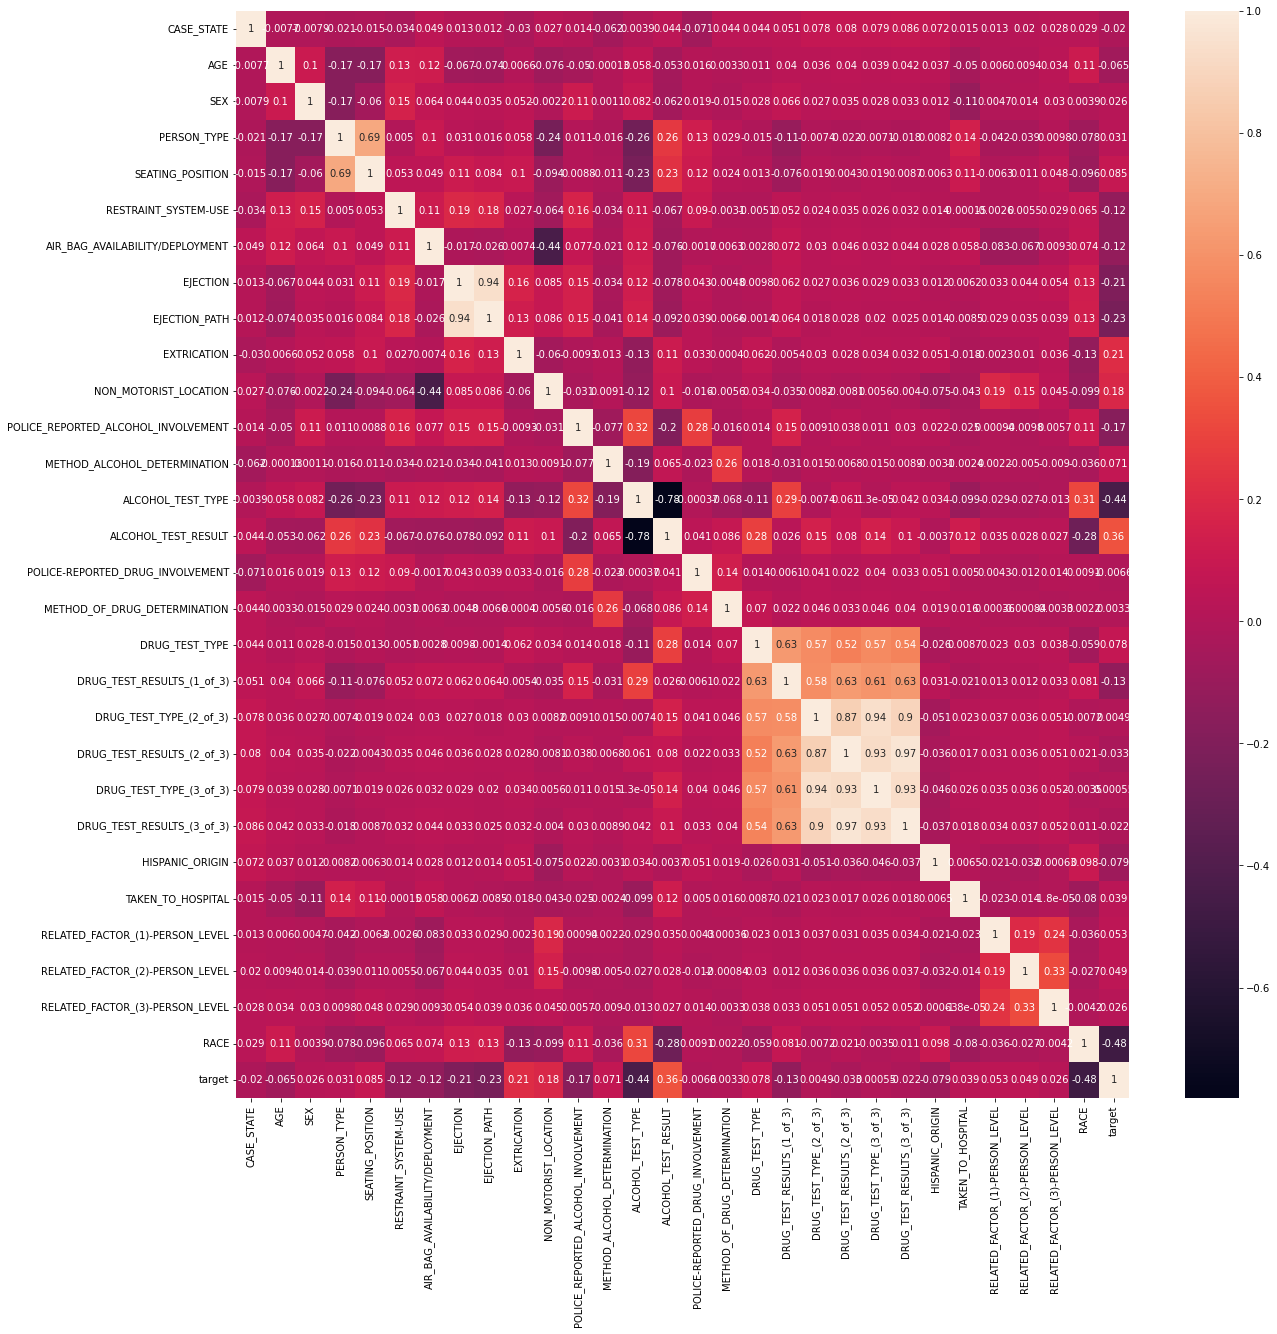

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True)

In [ ]:
### race and alcohol test type are coming biggest factor for high severity of accidents

In [ ]:
### checking duplicates

dup_rows = data.duplicated(keep = False)
print(dup_rows)

0         False
1         False
2         False
3         False
4         False
          ...  
100963    False
100964    False
100965    False
100966    False
100967    False
Length: 100968, dtype: bool


In [ ]:
dup_rows.size

100968

In [ ]:
data[data.duplicated(keep = 'first')]

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,target
69,0,1,1,6,16,1,4,0,0,1,...,0,2,0,6,2,27,29,19,11,2
126,0,99,2,6,6,5,4,0,0,1,...,0,2,0,6,0,27,29,19,11,4
170,0,99,2,6,6,5,4,0,0,1,...,0,2,0,6,0,27,29,19,11,4
173,0,32,0,1,3,5,4,0,0,1,...,0,2,0,6,2,27,29,19,11,2
225,0,1,1,6,16,1,4,0,0,1,...,0,2,0,6,2,27,29,19,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100539,49,20,1,1,3,5,4,0,0,1,...,0,2,0,6,0,27,29,19,11,4
100542,49,32,0,1,3,5,9,0,0,1,...,0,2,0,6,2,27,29,19,11,2
100786,50,46,1,1,3,5,4,0,0,1,...,0,2,0,6,0,27,29,19,11,4
100855,50,39,1,1,3,5,4,0,0,1,...,0,2,0,6,0,27,29,19,11,4


In [ ]:
data_dup = data[data.duplicated(keep=False)]

dup_indexes = data_dup.groupby(list(data_dup)).apply(lambda x: tuple(x.index)).tolist()
print (dup_indexes)
[(1, 6), (2, 4), (3, 5)]

[(797, 1158), (31, 69, 225, 2084), (462, 792), (1159, 1173, 1965), (516, 518), (782, 1792), (1791, 1820), (459, 534), (50, 1745, 2106), (135, 974), (1209, 1212), (205, 2140), (485, 838, 2077), (1210, 1213), (1108, 1648), (1671, 1787), (454, 458), (460, 461), (1438, 1944), (1621, 1622), (362, 916), (1181, 2262), (1731, 1839), (229, 444, 1349), (184, 1836), (709, 1232, 1350, 1661), (1440, 1483), (586, 587), (897, 2120), (513, 1145), (463, 1337), (1116, 1508), (2113, 2115), (718, 927), (598, 1284), (1300, 2080), (1125, 1522), (332, 1551), (48, 1370, 1538), (1058, 1722), (417, 1443), (1494, 2044), (272, 1710), (62, 1421), (1611, 2058), (99, 254), (1069, 1094), (1330, 1397), (174, 1110), (400, 561), (20, 673, 854, 1063), (1429, 1668), (220, 562), (883, 1055), (52, 296), (107, 173), (437, 557, 599), (650, 695, 1075, 2149), (738, 822), (29, 969), (431, 2050), (44, 1803), (2078, 2249), (397, 1259, 2196), (850, 1025), (563, 1135), (303, 1113, 1995), (5, 2233), (530, 1523, 1909), (288, 450, 1072

[(1, 6), (2, 4), (3, 5)]

In [ ]:
data.iloc[31,]

CASE_STATE                              0
AGE                                     1
SEX                                     1
PERSON_TYPE                             6
SEATING_POSITION                       16
RESTRAINT_SYSTEM-USE                    1
AIR_BAG_AVAILABILITY/DEPLOYMENT         4
EJECTION                                0
EJECTION_PATH                           0
EXTRICATION                             1
NON_MOTORIST_LOCATION                  16
POLICE_REPORTED_ALCOHOL_INVOLVEMENT     1
METHOD_ALCOHOL_DETERMINATION            2
ALCOHOL_TEST_TYPE                       4
ALCOHOL_TEST_RESULT                    96
POLICE-REPORTED_DRUG_INVOLVEMENT        2
METHOD_OF_DRUG_DETERMINATION            3
DRUG_TEST_TYPE                          2
DRUG_TEST_RESULTS_(1_of_3)              0
DRUG_TEST_TYPE_(2_of_3)                 2
DRUG_TEST_RESULTS_(2_of_3)              0
DRUG_TEST_TYPE_(3_of_3)                 2
DRUG_TEST_RESULTS_(3_of_3)              0
HISPANIC_ORIGIN                   

In [ ]:
data_dup.shape

(12768, 30)

In [ ]:
data.shape

(100968, 30)

In [ ]:
data_dup_removed = data.drop_duplicates()

In [ ]:
data_dup_removed.shape

(93004, 30)

### 7964 duplicate rows have been deleted

In [ ]:
data.columns

Index(['CASE_STATE', 'AGE', 'SEX', 'PERSON_TYPE', 'SEATING_POSITION',
       'RESTRAINT_SYSTEM-USE', 'AIR_BAG_AVAILABILITY/DEPLOYMENT', 'EJECTION',
       'EJECTION_PATH', 'EXTRICATION', 'NON_MOTORIST_LOCATION',
       'POLICE_REPORTED_ALCOHOL_INVOLVEMENT', 'METHOD_ALCOHOL_DETERMINATION',
       'ALCOHOL_TEST_TYPE', 'ALCOHOL_TEST_RESULT',
       'POLICE-REPORTED_DRUG_INVOLVEMENT', 'METHOD_OF_DRUG_DETERMINATION',
       'DRUG_TEST_TYPE', 'DRUG_TEST_RESULTS_(1_of_3)',
       'DRUG_TEST_TYPE_(2_of_3)', 'DRUG_TEST_RESULTS_(2_of_3)',
       'DRUG_TEST_TYPE_(3_of_3)', 'DRUG_TEST_RESULTS_(3_of_3)',
       'HISPANIC_ORIGIN', 'TAKEN_TO_HOSPITAL',
       'RELATED_FACTOR_(1)-PERSON_LEVEL', 'RELATED_FACTOR_(2)-PERSON_LEVEL',
       'RELATED_FACTOR_(3)-PERSON_LEVEL', 'RACE', 'target'],
      dtype='object')

In [ ]:
df = data_dup_removed
X = df.loc[:,df.columns != 'target']
y = df.loc[:,df.columns == 'target']

In [ ]:
X.shape

(93004, 29)

In [ ]:
y.shape

(93004, 1)

In [ ]:
X.head()

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_TYPE_(2_of_3),DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE
0,0,34,1,1,3,7,2,2,9,1,...,2,0,2,0,5,0,27,29,19,17
1,0,20,1,1,3,7,9,2,9,1,...,2,0,2,0,5,0,27,29,19,17
2,0,43,1,1,3,5,4,0,0,0,...,2,0,2,0,5,0,27,29,19,4
3,0,38,0,6,6,5,4,0,0,0,...,2,0,2,0,6,2,27,29,19,11
4,0,50,1,1,3,5,9,0,0,1,...,2,0,2,0,5,2,27,29,19,4


In [ ]:
y.head()

,target
0,1
1,1
2,1
3,2
4,1


In [ ]:
## scaing X

X = preprocessing.scale(X)
print(X)

#converting y from df to np array
y = y.to_numpy()

[[-1.55191214 -0.12337961  0.69723851 ...  0.04126579  0.00292968
   1.3495162 ]
 [-1.55191214 -0.78029424  0.69723851 ...  0.04126579  0.00292968
   1.3495162 ]
 [-1.55191214  0.29892265  0.69723851 ...  0.04126579  0.00292968
  -2.71789847]
 ...
 [ 1.75462623 -1.39028639 -1.37240181 ...  0.04126579  0.00292968
  -0.52775211]
 [ 1.75462623 -1.53105381 -1.37240181 ...  0.04126579  0.00292968
  -0.52775211]
 [ 1.75462623  1.14352717  0.69723851 ...  0.04126579  0.00292968
   1.3495162 ]]


AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

### Shuffling the dataset

In [ ]:
shuffled_indices = np.arange(X.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs = X[shuffled_indices]
shuffled_targets = y[shuffled_indices]

### Splitting train, test


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(65102, 29)
(27902, 29)
(65102, 1)


In [ ]:
y_train = y_train.flatten() #collapsing dimensions into 1 D

# building model

## decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTclf_model = DecisionTreeClassifier(criterion="gini", random_state=1,max_depth=5, min_samples_leaf=1)   
DTclf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [ ]:
y_predDT = DTclf_model.predict(X_test)
print('Accuracy of classifier on training set: {:.4f}'.format(DTclf_model.score(X_train, y_train)))
print('Accuracy of Decision tree classifier on test set: {:.4f}'.format(DTclf_model.score(X_test, y_test)))

Accuracy of classifier on training set: 0.7757
Accuracy of Decision tree classifier on test set: 0.7710


### optimising Decision tree using gridsearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_leaf_nodes': [3, 7, 10, 30, 40], 
          'min_samples_split': [4, 6, 8, 10],
          'max_depth':[4,5,6,7,8,10,13,15,20]}

DTclf_model = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters, cv= 5, verbose = 2, return_train_score = True)
DTclf_model.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_s

[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=5, max_l

[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=8; total time=   0.0s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=8; total time=   0.0s
[CV] END max_depth=6, max_le

[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=7, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=7, max_le

[CV] END .max_depth=8, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=8, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=8, max_leaf_nodes=3, min_samples_split=6; total time=   0.0s
[CV] END .max_depth=8, max_leaf_nodes=3, min_samples_split=6; total time=   0.0s
[CV] END .max_depth=8, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=8, max_leaf_nodes=3, min_samples_split=8; total time=   0.0s
[CV] END .max_depth=8, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=8, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=8, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=8, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=8, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=8, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=8, max_le

[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=8; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=8; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, m

[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=8; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=13, 

[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=8; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=7, min_samples_split=4; total time=   0.1s
[CV] END max_depth=15, 

[CV] END max_depth=20, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=7, min_samples_split=4; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=7, min_samples_split=4; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=7, min_samples_split=4; total time=   0.1s
[CV] END max_depth=20, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 10, 13, 15, 20],
                         'max_leaf_nodes': [3, 7, 10, 30, 40],
                         'min_samples_split': [4, 6, 8, 10]},
             return_train_score=True, verbose=2)

In [ ]:
DTclf_model.best_score_

0.7919879690977744

In [ ]:
DTclf_model.best_estimator_

DecisionTreeClassifier(max_depth=13, max_leaf_nodes=40, min_samples_split=4)

## DECISION TREE : Initial best accuracy obtained is 79.19%

## Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=None, max_leaf_nodes=None,min_samples_split=2)  
rf_clf.fit(X_train,y_train)
score = rf_clf.score(X_test, y_test)
print(score)

0.7608773564619024


## optimising random forest

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_depth' : [3,5,7],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5, verbose = 2)
rf_clf.fit(X_train, y_train)

# print best parameter after tuning
print(rf_clf.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(rf_clf.best_estimator_)

NameError: ignored

In [ ]:
y_predRF = rf_clf.predict(X_test)
print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(rf_clf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf_clf.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 0.79
Accuracy of Random Forest classifier on test set: 0.78


 # Dataset 2: CIFARTile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_X = np.load("/content/drive/MyDrive/ML_coursework_CIFARTile_data/train_x.npy", allow_pickle=True)

In [ ]:
train_y = np.load("/content/drive/MyDrive/ML_coursework_CIFARTile_data/train_y.npy", allow_pickle=True)

In [ ]:
validate_X = np.load("/content/drive/MyDrive/ML_coursework_CIFARTile_data/valid_x.npy", allow_pickle=True)

In [ ]:
validate_y = np.load("/content/drive/MyDrive/ML_coursework_CIFARTile_data/valid_y.npy", allow_pickle=True)

In [ ]:
test_X = np.load("/content/drive/MyDrive/ML_coursework_CIFARTile_data/test_x.npy", allow_pickle=True)

In [ ]:
test_y = np.load("/content/drive/MyDrive/ML_coursework_CIFARTile_data/test_y.npy", allow_pickle=True)

## Example image

In [ ]:

def image_normalization(arr):
    return (arr - arr.min())/(arr.max()-arr.min())

def disable_ax_ticks(ax):
    ax.set_xticks([])
    ax.set_xticks([], minor=True)
    ax.set_yticks([])
    ax.set_yticks([], minor=True)

def show_example(x, y):
    fig = plt.figure()
    main_ax = fig.add_subplot()
    fig.suptitle('label = '+ str(y))
    main_ax.imshow(image_normalization(np.moveaxis(x, 0, -1)))
    disable_ax_ticks(main_ax)

    plt.show()

In [ ]:
import random

count = train_X.shape[0]

ri = random.randrange(count)
show_example(train_X[ri], train_y[ri])

In [ ]:
unq, counts = np.unique(train_y, return_counts= True)
print(np.asarray((unq, counts)).T)

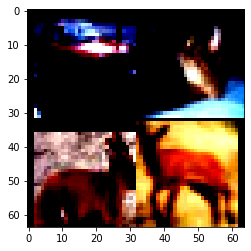

In [ ]:
fig = plt.figure()
m = fig.add_subplot()
m.imshow(np.moveaxis(train_X[50],0,-1))






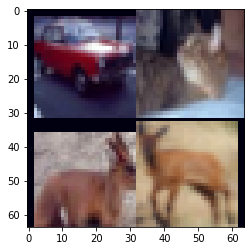

In [ ]:
def image_normalization(arr):
    return (arr - arr.min())/(arr.max()-arr.min())
fig = plt.figure()
m = fig.add_subplot()
m.imshow(image_normalization(np.moveaxis(train_X[50],0,-1)))


In [ ]:
train_X[50].max()

2.1267905

Sample classes looks equally distributed

In [ ]:
train_X.shape

In [ ]:
train_nsample, train_nrgb, train_nx,train_ny = train_X.shape

In [ ]:
train_X2 = train_X.reshape(train_nsample, train_nrgb*train_nx*train_ny)

In [ ]:
test_nsample, test_nrgb, test_nx,test_ny = test_X.shape

In [ ]:
test_X2 = test_X.reshape(test_nsample, test_nrgb*test_nx*test_ny)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()  
rf_clf.fit(train_X2[0:1000,:],train_y[0:1000])
score = rf_clf.score(train_X2[0:1000,:], train_y[0:1000])
print(score)

In [ ]:
test_score = rf_clf.score(test_X2, test_y)
print(test_score)

CV optimising

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [100,200, 500],
    'max_depth' : [3,5,7],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5, verbose = 2)
rf_clf.fit(train_X2[0:1000,:],train_y[0:1000])

# print best parameter after tuning
print(rf_clf.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(rf_clf.best_estimator_)


In [ ]:
rf_clf

In [ ]:
pred = rf_clf.predict(test_X2)

In [ ]:
rf_clf.score(test_X2,test_y)

In [ ]:
rf2 = RandomForestClassifier(n_estimators =100, max_depth=7, max_features='log2')
rf2.fit(train_X2,train_y)

rf2.score(test_X2,test_y)

optimised accuracy on test set = 28.97%

# SVM model

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(train_X2[0:5000,:], train_y[0:5000])

SVC()

In [ ]:
svm_clf.score(train_X2[0:5000,:], train_y[0:5000])

0.8392

In [ ]:
svm_clf.score(test_X2, test_y)

0.2828

# CNN model for classification

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
#train_X /= 255
train_X.shape

(45000, 3, 64, 64)

In [ ]:
train_X = image_normalization(train_X)
validate_X = image_normalization(validate_X)
test_X = image_normalization(test_X)

In [ ]:
batch_size = 32  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 100

In [ ]:
train_y = keras.utils.to_categorical(train_y, num_classes)
validate_y = keras.utils.to_categorical(validate_y, num_classes)
test_y = keras.utils.to_categorical(test_y, num_classes)

In [ ]:
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same',input_shape=train_X.shape[1:], data_format='channels_first'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 activation (Activation)     (None, 64, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 62, 62, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 64)        0         
                                                        

# ERROR |  ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv2d
### https://stackoverflow.com/questions/72413321/valueerror-one-of-the-dimensions-in-the-output-is-0-due-to-downsampling-in-c/72742906

In [ ]:
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
validate_X.shape

(15000, 3, 64, 64)

In [ ]:
history = model.fit(train_X, train_y,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(validate_X[0:10000], validate_y[0:10000]),
              shuffle=True)

Epoch 1/100
1407/1407 [==============================] - 40s 22ms/step - loss: 1.4198 - accuracy: 0.2540 - val_loss: 1.3977 - val_accuracy: 0.2689
Epoch 2/100
1407/1407 [==============================] - 30s 21ms/step - loss: 1.3814 - accuracy: 0.2790 - val_loss: 1.3730 - val_accuracy: 0.2936
Epoch 3/100
1407/1407 [==============================] - 30s 21ms/step - loss: 1.3665 - accuracy: 0.3036 - val_loss: 1.3538 - val_accuracy: 0.3188
Epoch 4/100
1407/1407 [==============================] - 30s 22ms/step - loss: 1.3545 - accuracy: 0.3178 - val_loss: 1.3446 - val_accuracy: 0.3234
Epoch 5/100
1407/1407 [==============================] - 30s 21ms/step - loss: 1.3431 - accuracy: 0.3269 - val_loss: 1.3312 - val_accuracy: 0.3396
Epoch 6/100
1407/1407 [==============================] - 30s 22ms/step - loss: 1.3202 - accuracy: 0.3493 - val_loss: 1.2873 - val_accuracy: 0.3759
Epoch 7/100
1407/1407 [==============================] - 30s 21ms/step - loss: 1.2975 - accuracy: 0.3659 - val_loss: 1

In [ ]:
pred = model.predict(test_X)

In [ ]:
scores = model.evaluate(test_X, test_y, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 3s 8ms/step - loss: 1.7309 - accuracy: 0.2934
Test loss: 1.7309081554412842
Test accuracy: 0.29339998960494995


Epoch 95/100
313/313 [==============================] - 5s 14ms/step - loss: 0.7692 - accuracy: 0.6927 - val_loss: 1.5744 - val_accuracy: 0.2856

Epoch 96/100
313/313 [==============================] - 6s 19ms/step - loss: 0.7678 - accuracy: 0.6951 - val_loss: 1.6140 - val_accuracy: 0.2910

Epoch 97/100
313/313 [==============================] - 6s 19ms/step - loss: 0.7639 - accuracy: 0.6998 - val_loss: 1.5469 - val_accuracy: 0.2825

Epoch 98/100
313/313 [==============================] - 6s 19ms/step - loss: 0.7550 - accuracy: 0.7037 - val_loss: 1.5854 - val_accuracy: 0.2806

Epoch 99/100
313/313 [==============================] - 5s 14ms/step - loss: 0.7414 - accuracy: 0.7056 - val_loss: 1.6917 - val_accuracy: 0.2838

Epoch 100/100
313/313 [==============================] - 5s 14ms/step - loss: 0.7398 - accuracy: 0.7092 - val_loss: 1.6005 - val_accuracy: 0.2835

Test loss: 1.6726701259613037 Test accuracy: 0.2858999967575073


>>2 ON FIRST 2 CONV layer of 64 64 i am getting last epoch accuracy of 45 val_acc 29  || test accuracy 31%


>>3 learning rate 0.001 instead 0.0001 | 51 accuracy, val  acc 28 % | test accuracy 29.3%

# 3 Tweets text analysis| Sentiment

In [84]:
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [85]:
df_train = pd.read_csv('/content/Tweets_train.csv')
df_val = pd.read_csv('/content/Tweets_dev.csv')
df_test = pd.read_csv('/content/Tweets_test (1).csv', encoding='latin-1')

In [5]:
df_train.head()

,tweet_id,text,airline_sentiment
0,569179849518161920,@united you're good. Thank you!,positive
1,569835751275433984,"@AmericanAir way to ruin a vacation, my brothe...",negative
2,568588936852799488,@JetBlue yes thankfully! Catering just got her...,positive
3,569525116725567491,@USAirways The automated message isn't helpful...,negative
4,568807823187976193,@JetBlue I'm #MakingLoveOutofNothingAtAll on m...,positive


## Do some EDA

## Preprocessing

In [86]:
data_train =df_train[['text', 'airline_sentiment']]
data_val = df_val[['text', 'airline_sentiment']]
data_test = df_test[['text', 'airline_sentiment']]

In [87]:
data_train

,text,airline_sentiment
0,@united you're good. Thank you!,positive
1,"@AmericanAir way to ruin a vacation, my brothe...",negative
2,@JetBlue yes thankfully! Catering just got her...,positive
3,@USAirways The automated message isn't helpful...,negative
4,@JetBlue I'm #MakingLoveOutofNothingAtAll on m...,positive
...,...,...
11853,"@AmericanAir will not help us on the phone, at...",negative
11854,@USAirways has the worst customer service line...,negative
11855,@USAirways grades for this trip:\n\nFlight tim...,negative
11856,@united Thanks for the vague canned response t...,negative


In [88]:
data_train.rename(columns= {'airline_sentiment':'target'}, inplace=True)
data_val.rename(columns= {'airline_sentiment':'target'}, inplace=True)
data_test.rename(columns= {'airline_sentiment':'target'}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [89]:
data_train['target'] = data_train['target'].map({'negative':0,'neutral':1,'positive':2})
data_val['target'] = data_val['target'].map({'negative':0,'neutral':1,'positive':2})
data_test['target'] = data_test['target'].map({'negative':0,'neutral':1,'positive':2})

<ipython-input-89-d2dbf254aa22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['target'] = data_train['target'].map({'negative':0,'neutral':1,'positive':2})
<ipython-input-89-d2dbf254aa22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_val['target'] = data_val['target'].map({'negative':0,'neutral':1,'positive':2})
<ipython-input-89-d2dbf254aa22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [45]:
data.head()

,text,target
0,@united you're good. Thank you!,2
1,"@AmericanAir way to ruin a vacation, my brothe...",0
2,@JetBlue yes thankfully! Catering just got her...,2
3,@USAirways The automated message isn't helpful...,0
4,@JetBlue I'm #MakingLoveOutofNothingAtAll on m...,2


In [92]:
data_val['target'].value_counts()

0    826
1    279
2    213
Name: target, dtype: int64

In [93]:
data_train['text'] = data_train['text'].str.lower()
data_val['text'] = data_val['text'].str.lower()
data_test['text'] = data_test['text'].str.lower()

<ipython-input-93-e707fedc3231>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['text'] = data_train['text'].str.lower()
<ipython-input-93-e707fedc3231>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_val['text'] = data_val['text'].str.lower()
<ipython-input-93-e707fedc3231>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [94]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [95]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data_train['text'] = data_train['text'].apply(lambda text: cleaning_stopwords(text))
data_val['text'] = data_val['text'].apply(lambda text: cleaning_stopwords(text))
data_test['text'] = data_test['text'].apply(lambda text: cleaning_stopwords(text))

data_train['text'].head()

<ipython-input-95-bfc2c4026231>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['text'] = data_train['text'].apply(lambda text: cleaning_stopwords(text))
<ipython-input-95-bfc2c4026231>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_val['text'] = data_val['text'].apply(lambda text: cleaning_stopwords(text))
<ipython-input-95-bfc2c4026231>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



0                      @united you're good. thank you!
1    @americanair way ruin vacation, brother called...
2    @jetblue yes thankfully! catering got loading,...
3    @usairways automated message isn't helpful it'...
4    @jetblue i'm #makingloveoutofnothingatall #bra...
Name: text, dtype: object

In [50]:
data['text'].tail()

11853    @americanair not help us phone, gate checkin. ...
11854    @usairways worst customer service line. i've c...
11855    @usairways grades trip: flight timeliness: 👎✈️...
11856    @united thanks vague canned response doesn't a...
11857    @united already airport 12 hrs late flightr st...
Name: text, dtype: object

## cleaning punctuations

In [96]:
import string
punctuations_list = string.punctuation

def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

data_train['text'] = data_train['text'].apply(lambda x: cleaning_punctuations(x))
data_val['text'] = data_val['text'].apply(lambda x: cleaning_punctuations(x))
data_test['text'] = data_test['text'].apply(lambda x: cleaning_punctuations(x))

data_train['text'].head()
# data_train
# data_val
# data_test

<ipython-input-96-38bf708e310e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['text'] = data_train['text'].apply(lambda x: cleaning_punctuations(x))
<ipython-input-96-38bf708e310e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_val['text'] = data_val['text'].apply(lambda x: cleaning_punctuations(x))
<ipython-input-96-38bf708e310e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

0                          united youre good thank you
1    americanair way ruin vacation brother called n...
2    jetblue yes thankfully catering got loading bu...
3    usairways automated message isnt helpful its i...
4    jetblue im makingloveoutofnothingatall brandlo...
Name: text, dtype: object

## cleaning repeating characters

In [97]:
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
data_train['text'] = data_train['text'].apply(lambda x: cleaning_repeating_char(x))
data_val['text'] = data_val['text'].apply(lambda x: cleaning_repeating_char(x))
data_test['text'] = data_test['text'].apply(lambda x: cleaning_repeating_char(x))
data_train['text'].head()

<ipython-input-97-8063a4a724ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['text'] = data_train['text'].apply(lambda x: cleaning_repeating_char(x))
<ipython-input-97-8063a4a724ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_val['text'] = data_val['text'].apply(lambda x: cleaning_repeating_char(x))
<ipython-input-97-8063a4a724ad>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

0                          united youre good thank you
1    americanair way ruin vacation brother called n...
2    jetblue yes thankfully catering got loading bu...
3    usairways automated message isnt helpful its i...
4    jetblue im makingloveoutofnothingatall brandlo...
Name: text, dtype: object

## removing URLs

In [98]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
data_train['text'] = data_train['text'].apply(lambda x: cleaning_URLs(x))
data_val['text'] = data_val['text'].apply(lambda x: cleaning_URLs(x))
data_test['text'] = data_test['text'].apply(lambda x: cleaning_URLs(x))

data_train.head()

<ipython-input-98-59cf64963302>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['text'] = data_train['text'].apply(lambda x: cleaning_URLs(x))
<ipython-input-98-59cf64963302>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_val['text'] = data_val['text'].apply(lambda x: cleaning_URLs(x))
<ipython-input-98-59cf64963302>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,text,target
0,united youre good thank you,2
1,americanair way ruin vacation brother called n...,0
2,jetblue yes thankfully catering got loading bu...,2
3,usairways automated message isnt helpful its i...,0
4,jetblue im makingloveoutofnothingatall brandlo...,2


In [99]:
# removing numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data_train['text'] = data_train['text'].apply(lambda x: cleaning_numbers(x))
data_val['text'] = data_val['text'].apply(lambda x: cleaning_numbers(x))
data_test['text'] = data_test['text'].apply(lambda x: cleaning_numbers(x))

data_train.head()

<ipython-input-99-37dc6e875a1f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['text'] = data_train['text'].apply(lambda x: cleaning_numbers(x))
<ipython-input-99-37dc6e875a1f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_val['text'] = data_val['text'].apply(lambda x: cleaning_numbers(x))
<ipython-input-99-37dc6e875a1f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,text,target
0,united youre good thank you,2
1,americanair way ruin vacation brother called n...,0
2,jetblue yes thankfully catering got loading bu...,2
3,usairways automated message isnt helpful its i...,0
4,jetblue im makingloveoutofnothingatall brandlo...,2


## tokenization

In [100]:
from nltk.tokenize import word_tokenize

data_train['text'] = data_train['text'].apply(word_tokenize)
data_val['text'] = data_val['text'].apply(word_tokenize)
data_test['text'] = data_test['text'].apply(word_tokenize)

data_train.head()

<ipython-input-100-d4a7aec741b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['text'] = data_train['text'].apply(word_tokenize)
<ipython-input-100-d4a7aec741b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_val['text'] = data_val['text'].apply(word_tokenize)
<ipython-input-100-d4a7aec741b3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

,text,target
0,"[united, youre, good, thank, you]",2
1,"[americanair, way, ruin, vacation, brother, ca...",0
2,"[jetblue, yes, thankfully, catering, got, load...",2
3,"[usairways, automated, message, isnt, helpful,...",0
4,"[jetblue, im, makingloveoutofnothingatall, bra...",2


## stemming

In [101]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
data_train['text'] = data_train['text'].apply(lambda x: stemming_on_text(x))
data_val['text'] = data_val['text'].apply(lambda x: stemming_on_text(x))
data_test['text'] = data_test['text'].apply(lambda x: stemming_on_text(x))

data_train.head()

<ipython-input-101-a3e31b189cb2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['text'] = data_train['text'].apply(lambda x: stemming_on_text(x))
<ipython-input-101-a3e31b189cb2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_val['text'] = data_val['text'].apply(lambda x: stemming_on_text(x))
<ipython-input-101-a3e31b189cb2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,text,target
0,"[united, youre, good, thank, you]",2
1,"[americanair, way, ruin, vacation, brother, ca...",0
2,"[jetblue, yes, thankfully, catering, got, load...",2
3,"[usairways, automated, message, isnt, helpful,...",0
4,"[jetblue, im, makingloveoutofnothingatall, bra...",2


In [102]:
# Lemmatizing
nltk.download('wordnet')
nltk.download('omw-1.4')

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
data_train['text'] = data_train['text'].apply(lambda x: lemmatizer_on_text(x))
data_val['text'] = data_val['text'].apply(lambda x: lemmatizer_on_text(x))
data_test['text'] = data_test['text'].apply(lambda x: lemmatizer_on_text(x))

data_train.head()
data_test.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
<ipython-input-102-448e771924f5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['text'] = data_train['text'].apply(lambda x: lemmatizer_on_text(x))
<ipython-input-102-448e771924f5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_val['text'] = data_val['text'].ap

,text,target
0,"[americanair, need, refund]",0
1,"[usairways, cancelled, flightlations, delay, c...",0
2,"[jetblue, thanks, much, cant, wait, fly, guys]",2
3,"[united, never, frustrated, conversations, uni...",0
4,"[usairways, worst, hold, time, crazy, agents, ...",0


In [111]:
# Splitting train data

X_train = pd.DataFrame(data_train.text)
y_train = data_train.target

X_val = pd.DataFrame(data_val.text)
y_val = data_val.target

X_test= pd.DataFrame(data_test.text)
y_test = data_test.target

print(X_train.shape)
print(y_train.shape)

print(X_val.shape)
print(y_val.shape)

print(X_test.shape)
print(y_test.shape)

(11858, 1)
(11858,)
(1318, 1)
(1318,)
(1464, 1)
(1464,)


In [80]:
# current text data contains list not strings, we can't make word cloud from this. so creating another variable

data2 =df_train[['text', 'airline_sentiment']]
data2['text']

0                          @united you're good. Thank you!
1        @AmericanAir way to ruin a vacation, my brothe...
2        @JetBlue yes thankfully! Catering just got her...
3        @USAirways The automated message isn't helpful...
4        @JetBlue I'm #MakingLoveOutofNothingAtAll on m...
                               ...                        
11853    @AmericanAir will not help us on the phone, at...
11854    @USAirways has the worst customer service line...
11855    @USAirways grades for this trip:\n\nFlight tim...
11856    @united Thanks for the vague canned response t...
11857    @united already did that at the airport and 12...
Name: text, Length: 11858, dtype: object

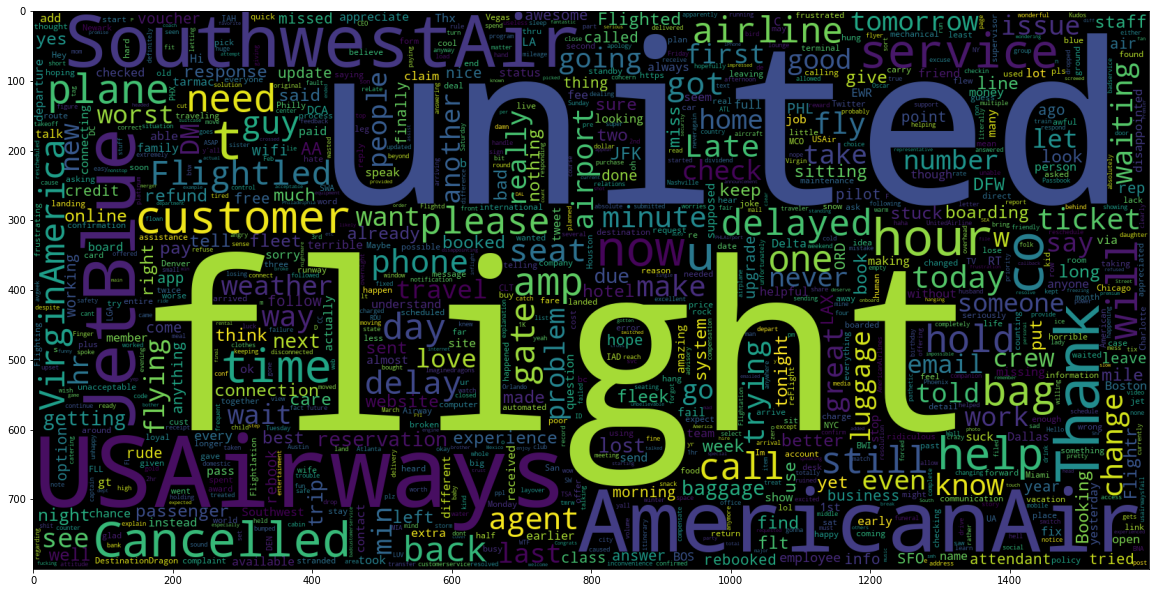

In [81]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data2['text']))
plt.imshow(wc)

## Transforming Dataset using TF-IDF Vectorizer

In [112]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  1


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [113]:
vectoriser.get_feature_names()

['text']

In [114]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [116]:
def model_Evaluate(model):
# Predict values for Test dataset
  y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [117]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

ValueError: ignored

In [119]:
X_train.size

1